<a href="https://colab.research.google.com/github/satyamkulkarni122/Assignment/blob/main/Assignment_Stock_Price_Prediction_For_HDFC_Bank_Share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment**    -  **Stock price prediction for HDFC Bank Share**



##### **Project Type**    - Time Series and Regression
##### **Contribution**    - Individual


# **Project Summary -**

The primary objective of this project is to conceive, develop, and assess a predictive model capable of anticipating stock price movements within a 2-4 week horizon, utilizing historical data sourced from Yahoo Finance. The model's purpose is to empower swing traders, offering precise insights into opportune entry and exit points for positions in the '**HDFC Bank**' stock.. Polynomial regression and timeseries - AutoRegressive Integrated Moving Average model was used for prediction.
**Yfinance** library was used as data source for this project because of its well maintained, structured and easily usable data.Stock prices were considered till 2023-12-02 from its listing date.

Data was already clean there was not much necessity for data cleaning.After visualising adjusted closing price of stock we can observe price is increasing with time.Histogram shows that time horizon of **2 - 4 week** is good for earning good returns.correlation heatmap shows, Open,high,low, close and Adjusted closing price of stock are highly corelated while all they all correlate with trading volume weakly.

Efficient market hypothesis with p-value of **0.00042** can be rejected hence concludes that future prices can be predicted using historical prices in case of stocks.

dataset was splitted, 80% data was used for machine learning model training while 20% was used for it's validation.Initially experimented with polynomial regression with 7th degree which gives lowest RMSE of about 170 but model was not found to be that suitable to capture time series data.Hence explored the ARIMA model with an order of (5, 2, 2), capturing autoregressive, differencing, and moving average components.

Evaluated both models based on their respective RMSE values. The polynomial regression yielded an RMSE of 170, while the ARIMA model achieved an improved RMSE of 117.Conducted model refinement, potentially through manual experimentation, leading to an improved RMSE value for the ARIMA model.

Developed a methodology to make future predictions using the ARIMA model, leveraging the yfinance library for retrieving new stock price data.Model predicts stock price with accuracy of 90-93%.Further complex machine algorithms could be explored to increase accuracy while decreasing RMS error.

**Recommendations and Next Steps:**
Implement continuous monitoring and evaluation of the ARIMA model's performance, updating it regularly as new data becomes available.

Consider exploring alternative time series forecasting models or ensemble methods to further enhance predictive capabilities.

**Outcome:**  
The project highlights the importance of model selection and iterative refinement, with the ARIMA model emerging as the preferred choice for stock price prediction in this context. The continuous monitoring and exploration of additional features are recommended for maintaining and enhancing the model's accuracy over time.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the realm of financial markets, strategic decision-making in stock trading plays a pivotal role for investors aiming to leverage short-term opportunities. The goal of this project is to construct an effective machine learning model tailored for predicting stock prices, with a specific focus on swing trading using Yahoo Finance data, and emphasizing the 'HDFC Bank' stock

**Objective:**

The primary objective of this project is to conceive, develop, and assess a predictive model capable of anticipating stock price movements within a 2-4 week horizon, utilizing historical data sourced from Yahoo Finance. The model's purpose is to empower swing traders, offering precise insights into opportune entry and exit points for positions in the 'HDFC Bank' stock.

The success of this project will be gauged by the model's precision in delivering short-term predictions for 'HDFC Bank' stock price, specifically tailored for swing trading within a 2-week horizon. Success will also be evident in the seamless integration of the model into the decision-making workflow of swing traders, leveraging Yahoo Finance data for the 'HDFC Bank' stock.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import warnings
warnings.filterwarnings('ignore')

!pip install yfinance
import yfinance as yf

!pip install mplfinance
import mplfinance as mpf

import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.3 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
# Load DataseT
stock_symbol = 'HDFCBANK.NS'

start_date = '1996-01-01'
end_date = '2023-12-02'

data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


### Dataset First View

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,3.030,3.030,2.925,2.980,2.362860,350000
1996-01-02,2.980,3.025,2.950,2.975,2.358896,412000
1996-01-03,2.975,2.995,2.950,2.985,2.366825,284000
1996-01-04,2.985,2.980,2.940,2.965,2.350967,282000
1996-01-05,2.965,2.980,2.950,2.960,2.347002,189000


In [ ]:
# Dataset First Look
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-24,1521.199951,1533.150024,1519.849976,1532.099976,1532.099976,8234596
2023-11-28,1535.199951,1537.250000,1525.800049,1528.650024,1528.650024,14244669
2023-11-29,1533.900024,1563.000000,1533.000000,1559.150024,1559.150024,17021244
2023-11-30,1569.150024,1572.449951,1542.150024,1558.800049,1558.800049,34745720
2023-12-01,1557.900024,1565.750000,1552.099976,1555.400024,1555.400024,11076768


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(7019, 6)

Dataset has 7015 rows and 6 columns

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7019 entries, 1996-01-01 to 2023-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7019 non-null   float64
 1   High       7019 non-null   float64
 2   Low        7019 non-null   float64
 3   Close      7019 non-null   float64
 4   Adj Close  7019 non-null   float64
 5   Volume     7019 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 383.9 KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

7

As we are dealing with stock prices, stock prices can repeat so duplicate values will not have any significance in this case.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: ylabel='Date'>

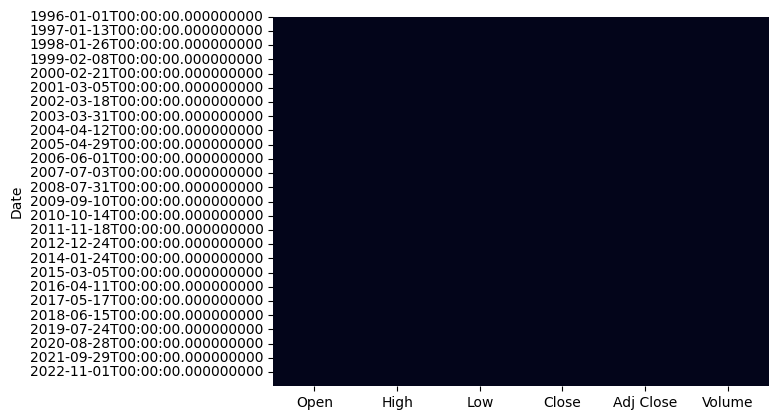

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

This dataset is HDFC bank share price data. Price data from 1996-01-01 to 2023-12-02 is considered for this analysis. Our objective for this project is to predict stock price in 2 weeks time horizon.

In this dataset, there are 7019 number of rows and 6 feature columns. Also there are no missing values in dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7019.000000,7019.000000,7019.000000,7019.000000,7019.000000,7.019000e+03
mean,415.149054,419.162172,410.783229,415.059252,398.828249,5.386038e+06
std,509.622865,513.904329,504.989089,509.459885,500.810384,6.156626e+06
min,2.435000,2.435000,2.395000,2.435000,1.930726,0.000000e+00
25%,24.437500,24.870001,24.004999,24.422500,20.590379,1.684440e+06
50%,165.100006,168.800003,162.199997,165.455002,148.649536,3.742000e+06
75%,622.512512,627.112488,617.675018,622.700012,593.106995,6.854922e+06
max,1723.449951,1757.500000,1713.800049,1728.199951,1728.199951,2.011300e+08


In [ ]:
# Datetime handling

data_2 = data.copy()

data_2['Returns'] = data_2['Adj Close'].pct_change()*100



We need to predict **close** price of this stock over the period of 2 - 4 weeks.

Data provided by Yahoo Finance is already well structred so no need of data wrangling for this case.

## ***4. Data Vizualization and Storytelling ***

#### Chart - 1 - Stock Price over Time

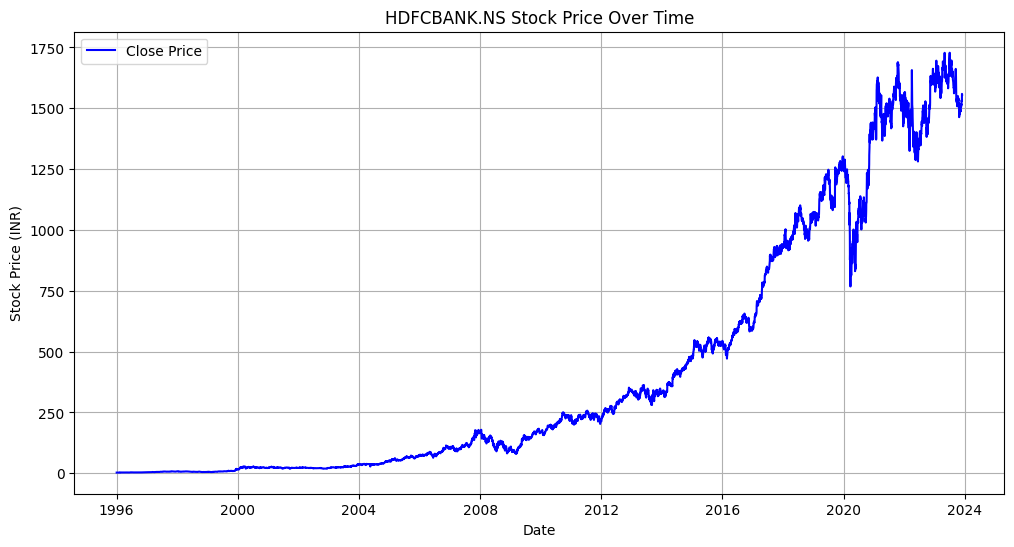

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 6))
plt.plot(data_2['Close'], label='Close Price', color='blue')
plt.title(f"{stock_symbol} Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Line chart is good way to check trends and patterns over the period of time. As we are trying to predict the price of stock it is very important to have idea of overall performance of stock since its listing.


##### 2. What is/are the insight(s) found from the chart?

From above line chart we can say that, stock price has increased exponentially since its listing in 1996.It seems to be at all time high in 2023.

#### Chart - 2 - Candlestick Chart

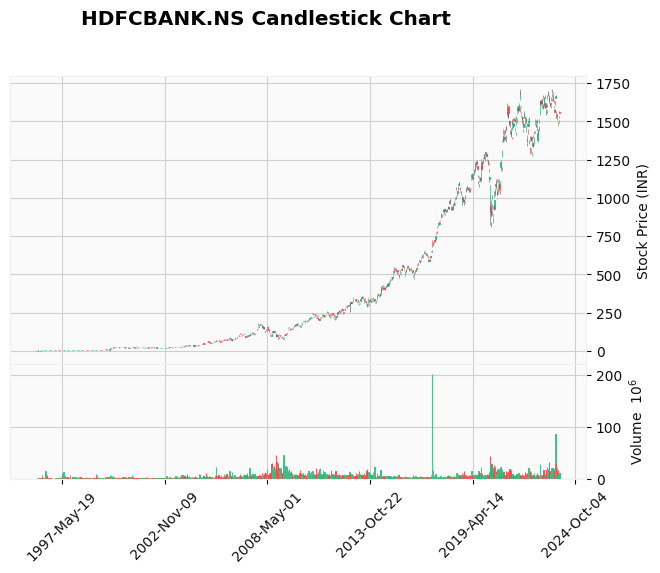

In [ ]:
# Chart - 2 visualization code
weekly_data = data_2.resample('W').last()

# Plot candlestick chart using mplfinance
mpf.plot(weekly_data, type='candle', title=f"{stock_symbol} Candlestick Chart",
         ylabel='Stock Price (INR)', style='yahoo', volume=True, show_nontrading=True)

# Show the plot
mpf.show()

##### 1. Why did you pick the specific chart?

Candlesticks chart are great way to identify micro and macro price movments.It also helps us know about price, its behaviour and volume at same time.

##### 2. What is/are the insight(s) found from the chart?

From above chart we can conclude that certain patterns are repeated over the period of time hence stock price might be predicted using those patterns in market prices. We can observe except in 2008(global financial crisis) and 2020(Covid crisis), stock seems to follow a certain patterns.

#### Chart - 3 - Histogram for Daily Returns

Date
1996-01-02   -0.167781
1996-01-03    0.336125
1996-01-04   -0.670019
1996-01-05   -0.168630
1996-01-08   -1.182421
                ...   
2023-11-24    0.709914
2023-11-28   -0.225178
2023-11-29    1.995225
2023-11-30   -0.022447
2023-12-01   -0.218118
Name: Returns, Length: 7018, dtype: float64


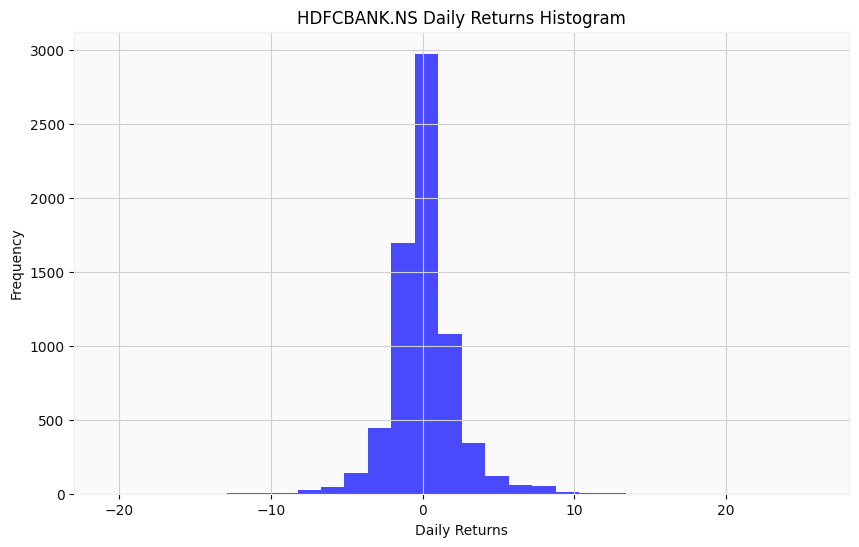

In [ ]:
# Calculate daily returns
# Drop missing values resulting from the return calculation

print(data_2['Returns'])

# Plot histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(data_2['Returns'], bins=30, color='blue', alpha=0.7)
plt.title(f"{stock_symbol} Daily Returns Histogram")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Histograms provide a visual representation of the distribution of a dataset. You can quickly see the shape, central tendency, and spread of the data.
Histograms show the frequency or count of data points within each interval or bin. This allows you to observe patterns, peaks, or gaps in the data.

##### 2. What is/are the insight(s) found from the chart?

From above histograms we can observe spread of daily retuns data follows normal distribution. daily returns are lower for this stock hence it is not feasible for swing trading.

#### Chart - 4 - Histogram for Weekly Returns

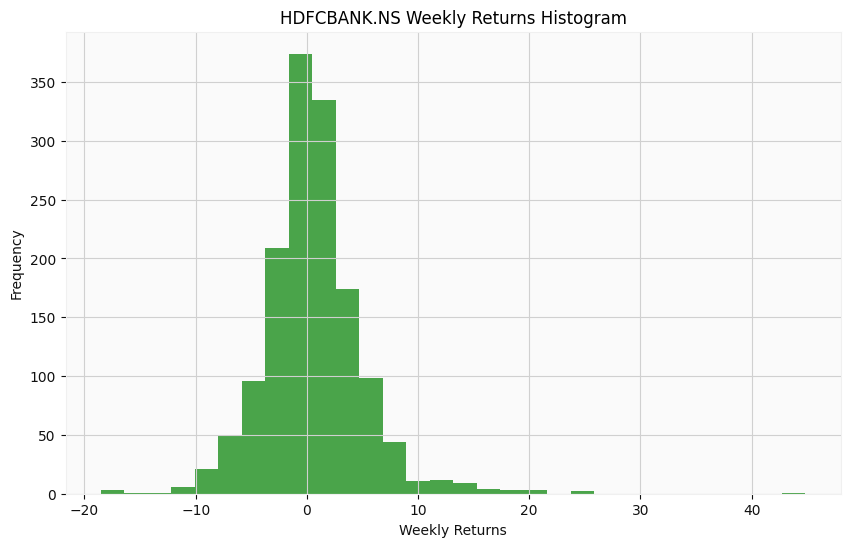

In [ ]:
# Chart - 4 visualization code
# Find Weekly returns of stock
weekly_data['Returns'] = weekly_data['Adj Close'].pct_change()*100

# Plot histogram of weekly returns
plt.figure(figsize=(10, 6))
plt.hist(weekly_data['Returns'], bins=30, color='green', alpha=0.7)
plt.title(f"{stock_symbol} Weekly Returns Histogram")
plt.xlabel("Weekly Returns")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

From above histograms we can observe spread of daily retuns data follows normal distribution. weekly returns are higher we can compared to daily returns we can get profit of 2%-3% for most of the trades, but still lower for swing trading.

#### Chart - 5 - Histogram for Monthly Returns

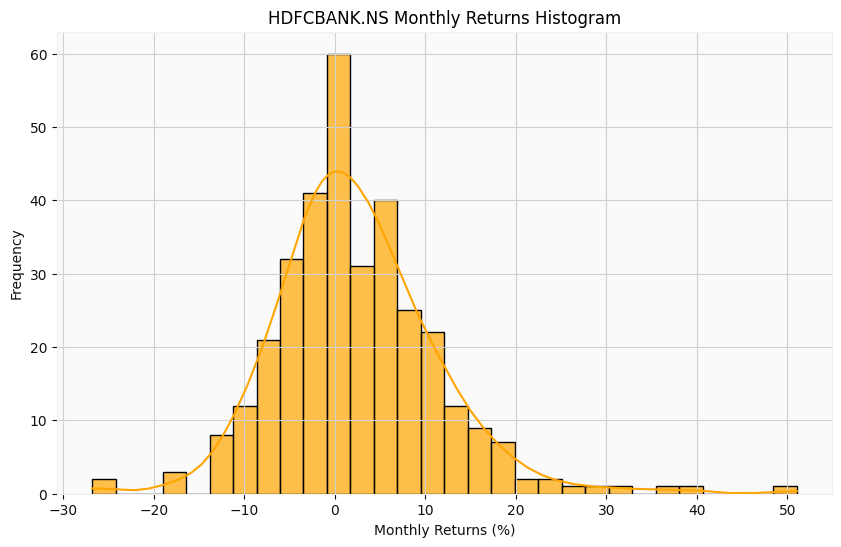

In [ ]:
# Chart - 5 visualization code
# Monthly returns
monthly_data = data_2.resample('M').last()

# Calculate monthly returns in percentage form
monthly_data['Returns'] = monthly_data['Adj Close'].pct_change() * 100

# Drop missing values resulting from the return calculation
monthly_data.dropna(inplace=True)


# Plot histogram of monthly returns
plt.figure(figsize=(10, 6))
sns.histplot(monthly_data['Returns'], bins=30, color='orange',kde = True, alpha=0.7, edgecolor='black')
plt.title(f"{stock_symbol} Monthly Returns Histogram")
plt.xlabel("Monthly Returns (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

From above chart we can infer that there are highest chance of earning 0 - 2% returns on monthly  basis for this stock. This graph is right skewed stating that there are chances of getting returns of about 50% if analysed the chart carefully.

**Considering above insights - timeframe of 2 - 4 weeks can be considered for each swing trade**

#### Chart - 6 - Seasonality Analysis

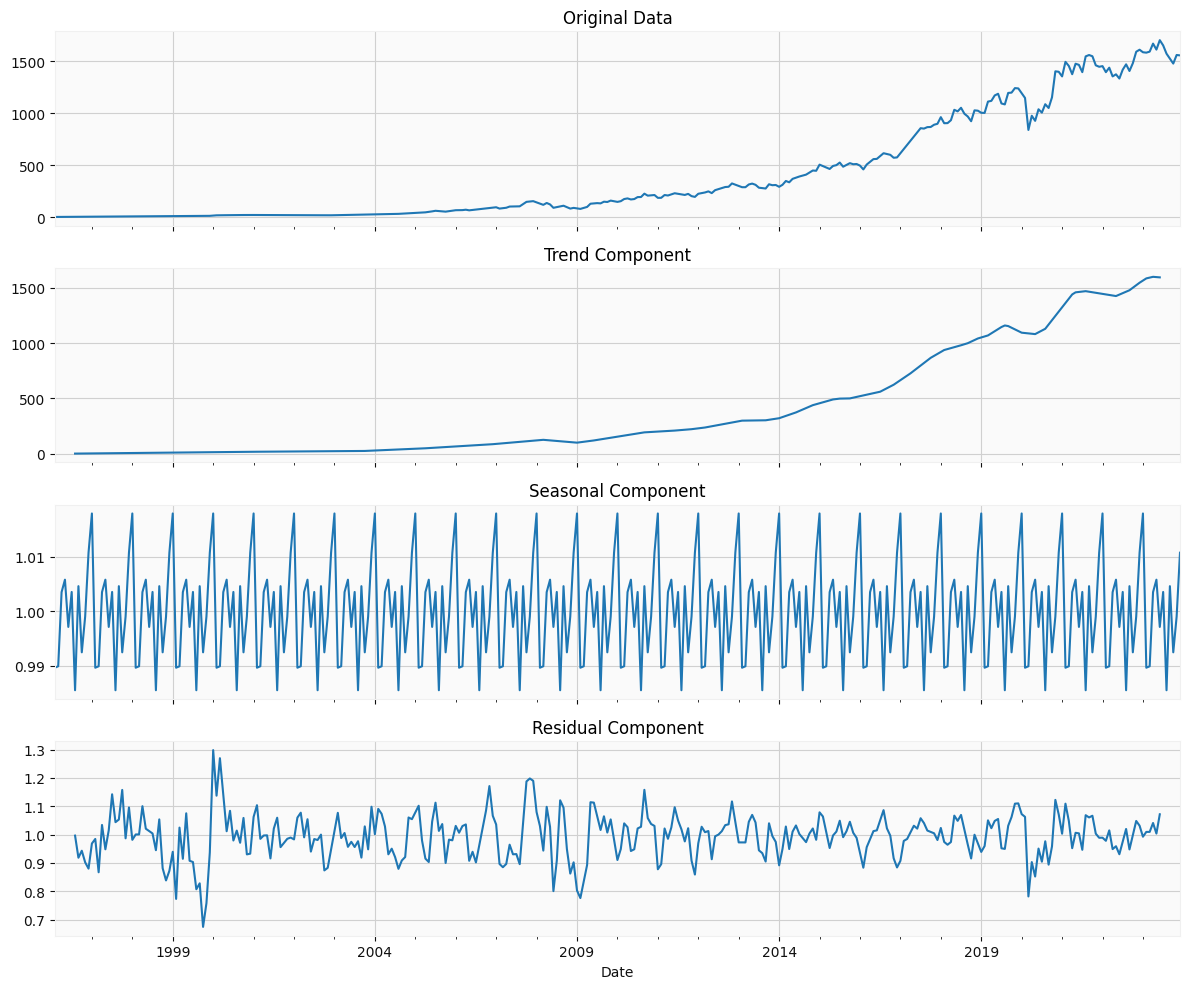

In [ ]:
# Chart - 6 visualization code
# Code for seasonality analysis

monthly_data['Month'] = monthly_data.index.month

# Perform seasonality analysis using seasonal decomposition
result = sm.tsa.seasonal_decompose(monthly_data['Adj Close'], model='multiplicative', period=12)

# Plot the original data, trend, seasonal, and residual components
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

monthly_data['Adj Close'].plot(ax=axes[0], title='Original Data')
result.trend.plot(ax=axes[1], title='Trend Component')
result.seasonal.plot(ax=axes[2], title='Seasonal Component')
result.resid.plot(ax=axes[3], title='Residual Component')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

For seasonality analysis line charts are used because line charts gives better idea of trends and seasonal variations. As equity markets are prone to seasonal variations it is important to check them.

##### 2. What is/are the insight(s) found from the chart?

From above chart we can observe that, Every year there are dips in stock at middle of the financial year and stock attains peak at start and end of the financial year. This might be the case as banks release earnings report at start of new financial year and HDFC has shown consistently good earnings for most of the years.

#### Chart - 7 - Correlation Heatmap

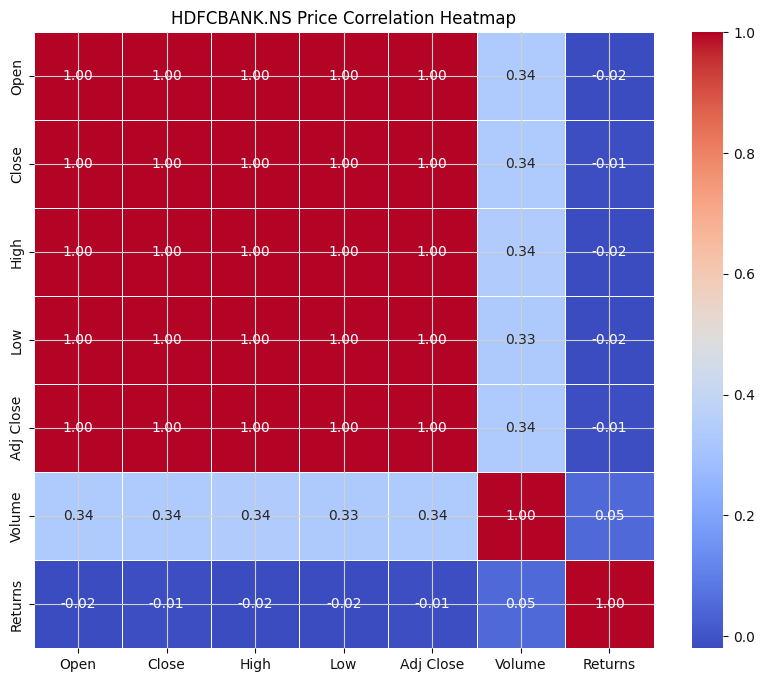

In [ ]:
# Correlation Heatmap visualization code
correlation_matrix = data_2[['Open', 'Close','High','Low','Adj Close','Volume','Returns']].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f"{stock_symbol} Price Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap is used because
Quickly identify and interpret relationships between pairs of variables. The heatmap provides an intuitive visual summary of correlation patterns in the data.
Perform multivariate analysis by examining correlations among multiple variables simultaneously. This is especially useful in datasets with many features.

##### 2. What is/are the insight(s) found from the chart?

From above heatmap we can observe, There is positive relation between volume and open/close price of stock..
There is also positive relation between volume and returns but this correlation is weak.

#### Chart - 8 - Pair Plot

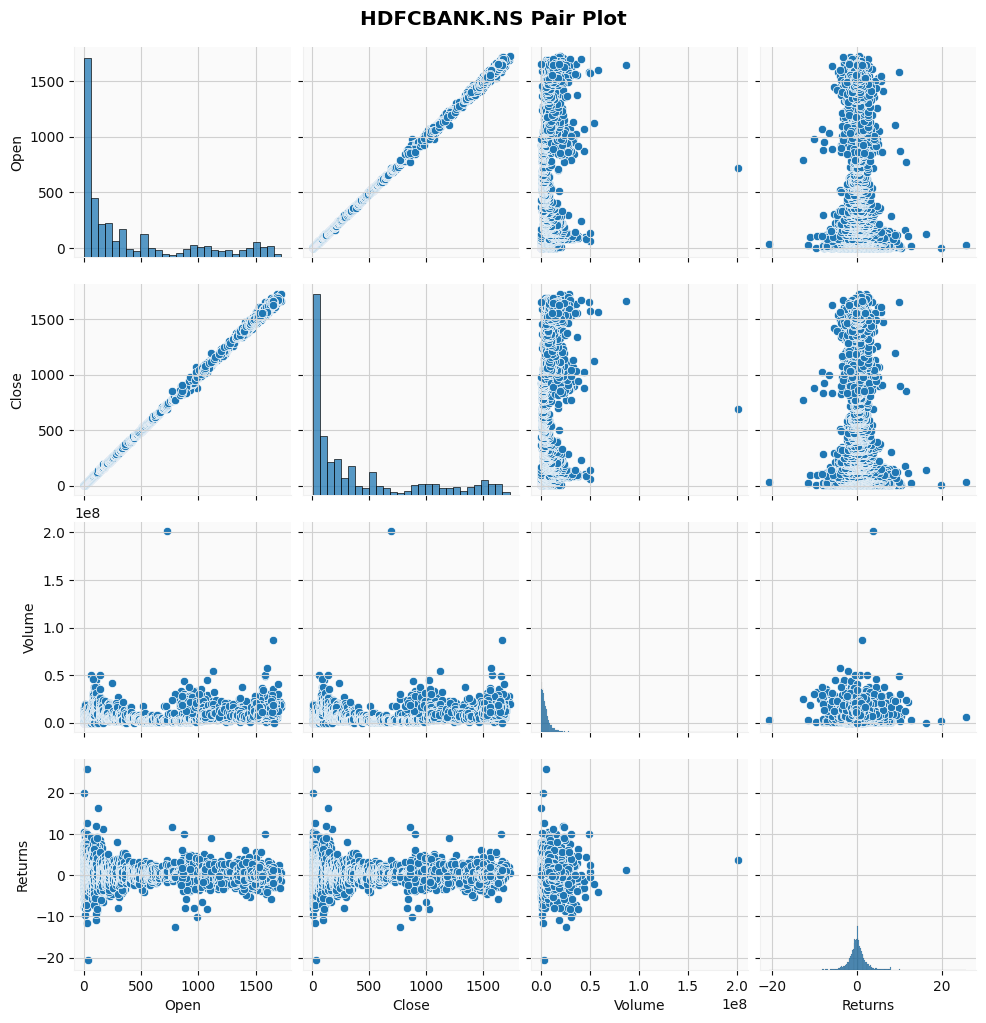

In [ ]:
# Pair Plot visualization code
selected_columns = ['Open', 'Close', 'Volume', 'Returns']

# Create a pair plot
sns.pairplot(data_2[selected_columns])
plt.suptitle(f"{stock_symbol} Pair Plot", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Pir plot is used because,
Pair plots help us visually identify patterns and trends in your data by displaying scatterplots for all possible pairs of variables. This can reveal correlations, clusters, or any other relationships that may exist.

##### 2. What is/are the insight(s) found from the chart?

From above pair plot we can observe, There is positive relation between volume and open/close price of stock..
There is also positive relation between volume and returns but this correlation is weak.

## ***5. Hypothesis Testing***

### Hypothetical Statement - Efficient Market Hypothesis

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: Historical price and volume information does not provide an advantage for predicting future prices.

**Alternative Hypothesis (H1)**: Historical price and volume information provides an advantage for predicting future prices.

**Let's perform autocorrelation test to check our hypothesis.**

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
data_2.dropna(subset=['Returns'], inplace=True)

# Calculate autocorrelation
autocorrelation = data_2['Returns'].autocorr()

# Perform autocorrelation test
lags = 5
lb_test = sm.stats.acorr_ljungbox(data_2['Returns'], lags=[lags], return_df=True)
p_value = lb_test['lb_pvalue'].iloc[0]

# Print results
print(f"Autocorrelation: {autocorrelation}")
print(f"P-value : {p_value}")

Autocorrelation: 0.016109567629793695
P-value : 0.00042244317130845217


##### Which statistical test have you done to obtain P-Value?

In this case Auto-correlation test is used to test hypothesis. we assume significance level of 0.05 which is common level.

From above p-value of 0.0004 we observe that this value is lower than significance level hence evidence for null hypothesis are not significant enough.Hence we reject null hypothesis.

From this we can conclude that we can predict future price of stock using its past performance.

##### Why did you choose the specific statistical test?

Autocorrelation test is  used because,
In finance, autocorrelation tests are often used to assess the Efficient Market Hypothesis (EMH). If stock prices exhibit autocorrelation, it suggests that past price information may be used to predict future prices, challenging the notion of market efficiency.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
data_2.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Returns      0
dtype: int64

There are no missing values in datasets
Price is generated by demand and supply in market hence concept of outlier can not be used for this dataset.

### 3. Categorical Encoding

In [ ]:
data_2.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Returns      float64
dtype: object

There are no categorical variables in dataset

#### 1. Feature Selection

From above correlation heatmap we can observe that, Open,close,high and low prices of stock are highly correlated so we can use only Adj closing price for stock price prediction algorithm.

Also as we are going to predict prices for swing trades hence we need monthly returns data which need to be added in our dataset.

### 8. Data Splitting

In [ ]:
# Split your data to train and test.
data_2['Date'] = data_2.index

# Selecting features as a DataFrame
X = data_2[['Date']]
y = data_2['Adj Close']

# Convert date to a numerical representation if needed
X['Date'] = pd.to_numeric(X['Date'])

# Determine the size of training and validation sets based on a percentage of the data
train_size = int(len(data_2) * 0.8)  # 80% for training
val_size = len(data_2) - train_size   # Remaining for validation

# Split the data
X_train, X_val = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_val = y.iloc[:train_size], y.iloc[train_size:]

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)

Training set: (5615, 1) (5615,)
Validation set: (1404, 1) (1404,)


##### What data splitting ratio have you used and why?

For time-series data, an 80-20 split is often used, where the larger portion is allocated to the training set. This ensures that the model has enough historical data to learn from and is then tested on a more recent dataset to assess its performance on unseen data.


## ***7. ML Model Implementation***

*   ML Model - 1 - Polynomial Regression
*   ML Model - 2 - Time Series - Autoregressive Integrated Moving Average



Only Adj Close price is going to be used for stock price prediction hence no need of data scaling as there will be only one column along with datetime index.

### ML Model - 1 - Polynomial Regression

In [ ]:
# Polynomial Regression

degree = 7  # You can adjust the degree as needed
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model on the training data
polyreg.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_poly = polyreg.predict(X_val)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Root Mean Squared Error on Validation Set (Polynomial Regression): 170.01399280113128


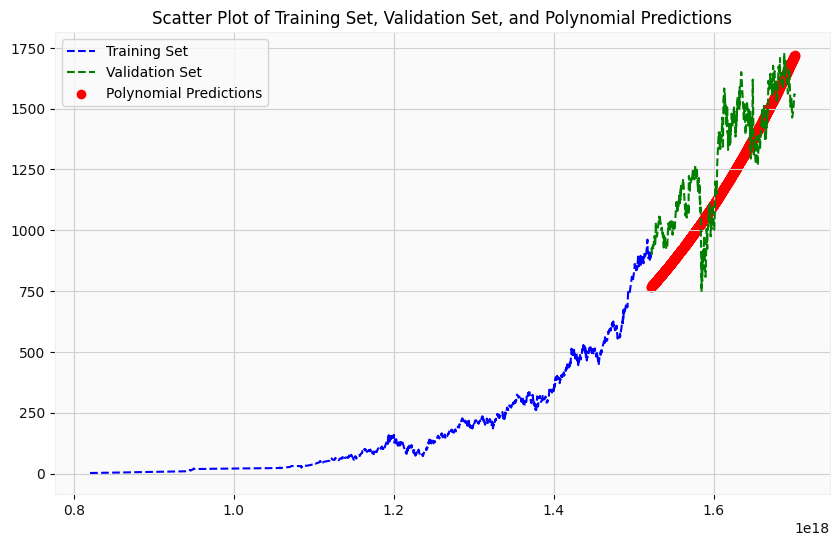

In [ ]:
# Evaluate the model
rmse_poly = np.sqrt(mean_squared_error(y_val, y_pred_poly))
print(f'Root Mean Squared Error on Validation Set (Polynomial Regression): {rmse_poly}')

# Plot the actual vs predicted Adj Close
plt.figure(figsize=(10, 6))
plt.plot(X_train['Date'], y_train, label='Training Set', linestyle='dashed', color='blue')
plt.plot(X_val['Date'], y_val, label='Validation Set', linestyle='dashed', color='green')
plt.scatter(X_val['Date'], y_pred_poly, label='Polynomial Predictions', color='red')

plt.legend()
plt.title('Scatter Plot of Training Set, Validation Set, and Polynomial Predictions')
plt.show()

### ML Model - 2 - Time Series - Autoregressive Integrated Moving Average

In [ ]:
# ML Model - 1 Implementation
import warnings
warnings.filterwarnings("ignore")

# Fit ARIMA model
model = ARIMA(y_train, order=(5, 2, 2))
fit_model = model.fit()

# Make predictions on the test set
predictions = fit_model.predict(start=len(y_train), end=len(y_train) + len(y_val) - 1, typ='levels')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Root Mean Squared Error (RMSE): 117.14606952150494


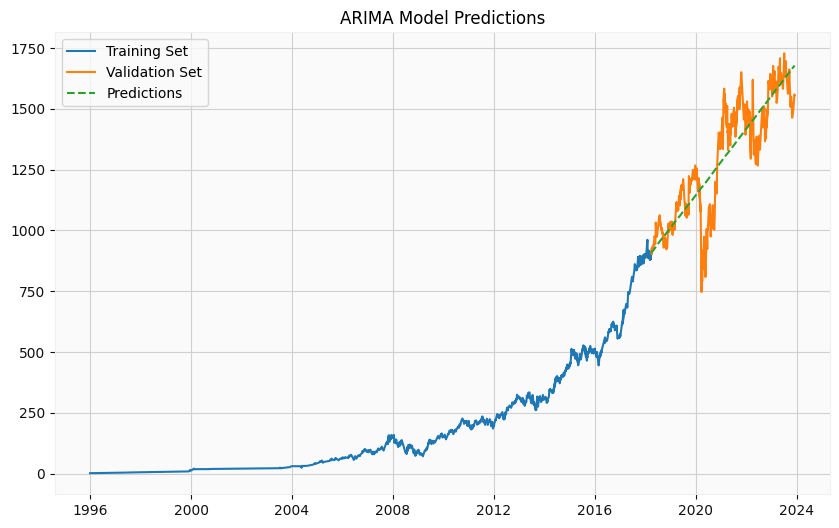

In [ ]:
# Visualizing evaluation Metric Score chart
# Evaluate the model
mse = mean_squared_error(y_val, predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Training Set')
plt.plot(y_val.index, y_val, label='Validation Set')
plt.plot(y_val.index, predictions, label='Predictions', linestyle='dashed')
plt.legend()
plt.title('ARIMA Model Predictions')
plt.show()

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From above results of we can observe that, timeseries model has lower RMSE value compared to polynomial regression model. Timeseries ML models are bestsuited for timeseries data like stock market price data.

Hence **Time Series - Autoregressive Integrated Moving Average** ML model is selected for final predictions which has RMSE of about 117 which is reasonable considering range of data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Traditional feature importance and interpretation tools are designed for complex machine learning models and might not be directly applicable, as ARIMA is a time series forecasting model based on historical data patterns.

Let's understand the model,
Time Series - Autoregressive Integrated Moving Average(ARIMA) ML model was selected for analysis of this dataset. Adjusted closing price was used as feature and date is index of yfinance dataset.
data was divided into training and validation. Training data was trained using ARIMA ML model and hyperparameters(p,d,q) of (5,2,2) is selcted by performing iterations on each hyper parameter.
initially autoregressive order(p) was assumed to be 5 and moving average order9q) assumed to be 2. Further Differencing Order(d) was changed  to 2 from 1 considering RMSE value.

Predictions made on validation data and Root mean squared error was used for evaluation as RMSE is interpretable in the same units as the target variable, making it easy to understand and communicate the model's performance to stakeholders who may not have a deep understanding of the specific metrics used.

Finally graph of training, validation and predicted data was plotted to check how the ML model captures validation data.

Below is the brief summary of Model training.

In [ ]:
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 7019
Model:                 ARIMA(5, 2, 2)   Log Likelihood              -25766.333
Date:                Mon, 04 Dec 2023   AIC                          51548.665
Time:                        12:06:21   BIC                          51603.514
Sample:                             0   HQIC                         51567.563
                               - 7019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6888      0.029    -23.854      0.000      -0.745      -0.632
ar.L2         -0.0305      0.005     -5.896      0.000      -0.041      -0.020
ar.L3         -0.0729      0.006    -12.666      0.0

# **Conclusion**

The goal of the project was to predict stock price of HDFC Bank using machine learning algorithms.The dataset, named data, contained stock prices with a datetime index and closing prices as the target variable.
As data is used from yfinance library it is well structered and cleaned dataset, there was no need to clean it explicitly.Different types graph was plotted to understand overall trends and distributions of data.

Initially polynomial regression model was trained on dataset but as RMSE value was higher and it was less compatible with timeseries data hence Timeseries model was created.The ARIMA model was trained on the provided dataset using an order of (5, 2, 2).
The choice of hyperparameters (p=5, d=2, q=2) was determined through experimentation, aiming to capture the underlying patterns in the time series data.

The Root Mean Squared Error (RMSE) was used as the evaluation metric, with a reported value of approximately 117.The results indicate that the current ARIMA model can provide fairly accurate predictions, Further steps could involve refining the model or considering alternative time series forecasting methods.

**Recommendations and Future Work**:

1) Explore Alternative Models.

2) Ensemble Different Models to further increase prediction accuracy.

3) Considering External Factors.

4) Continuous Monitoring of model's performance.

In conclusion, The project has demonstrated the effectiveness of iterative model refinement, leading to a more accurate ARIMA model for stock price prediction. Further exploration and ongoing monitoring will contribute to maintaining the model's relevance and reliability over time.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***